Voici la version ajustée du script pour ton formulaire, avec les modifications spécifiques que tu as demandées pour chaque thème :

---

### Sondage sur les Thèmes de Formation en Data Science

Nous souhaitons organiser une session de formation technique et nous aimerions connaître vos préférences. Voici quatre thèmes proposés, avec une brève description :

### 1. **Prédiction des prix des actions avec des séries temporelles financières**
- **Description** : Explorer l'évolution des prix des actions en utilisant des données historiques de **Yahoo Finance**. Des modèles tels que **ARIMA** et **LSTM** pourraient être utilisés pour des prédictions temporelles.

### 2. **Détection des anomalies dans les transactions financières**
- **Description** : Identifier des transactions potentiellement frauduleuses ou inhabituelles. Techniques comme **Isolation Forest** et des méthodes simples comme la **régression logistique** pourraient être utilisées pour détecter des anomalies.

### 3. **Analyse de sentiment sur des commentaires d'analystes financiers**
- **Description** : Évaluer le sentiment et les thèmes principaux à partir de commentaires, traités comme des retours d'utilisateurs. L'approche pourrait inclure **Bag of Words** pour la vectorisation du texte et des techniques de **clustering** pour regrouper les thèmes.

### 4. **Prédiction de l'autorisation des prêts bancaires**
- **Description** : Évaluer le risque associé à l'octroi de prêts en utilisant des données clients. Les modèles de **Random Forest** et de **Decision Trees** seraient envisagés pour prédire la probabilité d'autorisation de prêts.

### Votre avis nous intéresse :
- Quel(s) thème(s) vous intéressent le plus ?
- Préféreriez-vous une présentation, des ateliers pratiques, ou un autre format d'apprentissage ?

Merci de nous faire part de vos préférences pour nous aider à concevoir une session qui répondra au mieux à vos attentes.

---

Cette version inclut des détails spécifiques sur les datasets et les modèles proposés pour chaque thème, tout en gardant un ton engageant et accessible pour encourager la participation.

In [8]:
import yfinance as yf
import pandas as pd

# Define the stock symbol for the company and the time period
stock_symbol = 'JNJ'  # Johnson & Johnson
start_date = '2018-01-01'
end_date = '2023-01-01'

# Download the stock data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Resample the data to get weekly averages
weekly_data = data.resample('W').mean()

# Display the first few rows of the dataframe
weekly_data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-07,140.040001,140.897499,139.529999,140.512501,116.748035,5797250.0
2018-01-14,143.348001,144.631998,143.017999,144.109998,119.737090,6199640.0
2018-01-21,147.162498,147.867500,145.974998,147.029999,122.163248,8429325.0
2018-01-28,144.856000,145.880002,143.296002,144.354001,119.939828,10704560.0
2018-02-04,141.474002,142.472003,139.688000,140.399997,116.654575,9636600.0


calcul des indéicateurs techniques

Nous allons calculer plusieurs indicateurs techniques qui sont couramment utilisés dans l'analyse des marchés financiers :

Moyennes Mobiles (SMA et EMA) : Ces indicateurs lissent les prix des actions sur une période spécifique et sont utiles pour identifier les tendances du marché.
Bande de Bollinger : Cet indicateur fournit des signaux sur la volatilité du marché.
Indicateur de Force Relative (RSI) : Il aide à identifier les conditions de surachat ou de survente sur le marché.

In [9]:
# Calculate Simple Moving Average (SMA) for 50 and 200 weeks
weekly_data['SMA_50'] = weekly_data['Close'].rolling(window=50).mean()
weekly_data['SMA_200'] = weekly_data['Close'].rolling(window=200).mean()

# Calculate Exponential Moving Average (EMA) for 50 and 200 weeks
weekly_data['EMA_50'] = weekly_data['Close'].ewm(span=50, adjust=False).mean()
weekly_data['EMA_200'] = weekly_data['Close'].ewm(span=200, adjust=False).mean()

# Calculate Bollinger Bands
rolling_mean = weekly_data['Close'].rolling(window=20).mean()
rolling_std = weekly_data['Close'].rolling(window=20).std()
weekly_data['Bollinger_Upper'] = rolling_mean + (rolling_std * 2)
weekly_data['Bollinger_Lower'] = rolling_mean - (rolling_std * 2)

# Calculate Relative Strength Index (RSI)
delta = weekly_data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
weekly_data['RSI'] = 100 - (100 / (1 + rs))


visualisation des indicateurs

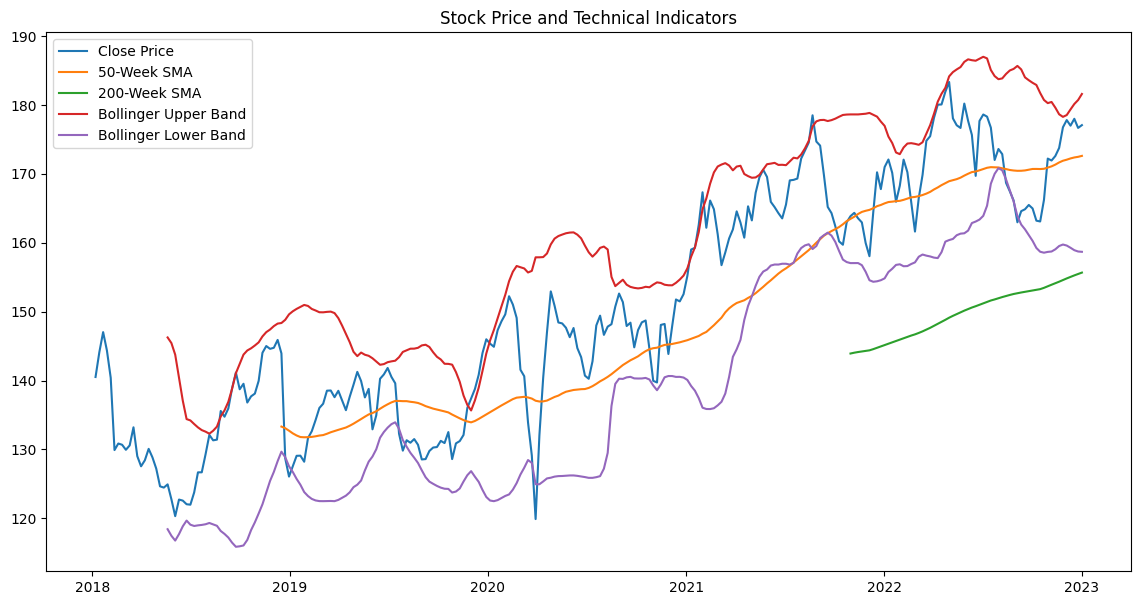

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(weekly_data['Close'], label='Close Price')
plt.plot(weekly_data['SMA_50'], label='50-Week SMA')
plt.plot(weekly_data['SMA_200'], label='200-Week SMA')
plt.plot(weekly_data['Bollinger_Upper'], label='Bollinger Upper Band')
plt.plot(weekly_data['Bollinger_Lower'], label='Bollinger Lower Band')
plt.title('Stock Price and Technical Indicators')
plt.legend()
plt.show()


model arima simple

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1049.871, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1060.476, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1053.691, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1053.051, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1058.751, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1047.940, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1055.051, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1054.778, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1049.890, Time=0.27 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1056.356, Time=0.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1051.849, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1048.971, Time=0.08 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 1.795 seconds
                           

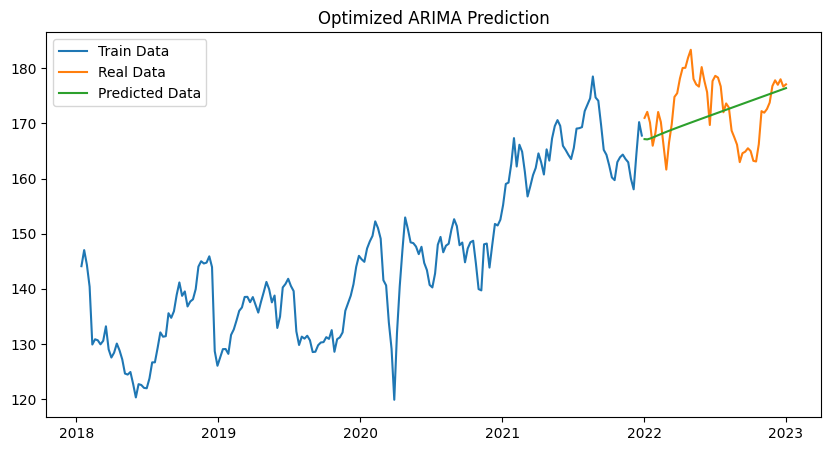

In [11]:
from pmdarima import auto_arima

# Chercher le meilleur modèle ARIMA
model = auto_arima(train_data, seasonal=False, stepwise=True, suppress_warnings=True, error_action="ignore", max_order=None, trace=True)

# Afficher le résumé du modèle
print(model.summary())

# Utiliser le modèle pour faire des prédictions
predictions = model.predict(n_periods=len(test_data))

# Visualiser les prédictions
plt.figure(figsize=(10,5))
plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Real Data')
plt.plot(test_data.index, predictions, label='Predicted Data')
plt.title('Optimized ARIMA Prediction')
plt.legend()
plt.show()


2. ARIMA multivarié avec indicateurs techniques


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assurez-vous que vos données sont chargées
# Supposons que 'weekly_data' contienne toutes les données nécessaires

# Séparation des données en ensembles d'entraînement et de test
train_data = weekly_data.iloc[:int(len(weekly_data) * 0.8)]
test_data = weekly_data.iloc[int(len(weekly_data) * 0.8):]

# Sélection des données de prix de clôture comme variable cible
y_train = train_data['Close']
y_test = test_data['Close']

# Sélection des indicateurs techniques comme variables exogènes
exog_train = train_data[['SMA_50', 'EMA_50', 'RSI', 'Bollinger_Upper', 'Bollinger_Lower']]
exog_test = test_data[['SMA_50', 'EMA_50', 'RSI', 'Bollinger_Upper', 'Bollinger_Lower']]

# Création et ajustement du modèle ARIMA avec variables exogènes
model = SARIMAX(y_train, 
                order=(2, 1, 1), 
                seasonal_order=(0, 0, 0, 0), 
                exog=exog_train)
result = model.fit(disp=False)

# Prédictions
predictions = result.forecast(steps=len(y_test), exog=exog_test)

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train, label='Train Data')
plt.plot(y_test.index, y_test, color='blue', label='Actual Price')
plt.plot(y_test.index, predictions, color='red', label='Predicted Price')
plt.fill_between(y_test.index, predictions - 1.96 * result.se_scale, predictions + 1.96 * result.se_scale, color='pink', alpha=0.3)
plt.title('ARIMA Multivariate Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Evaluation des prédictions
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))


MissingDataError: exog contains inf or nans

In [ ]:
Voici une présentation des quatre thèmes sélectionnés avec des cas d'usage précis, des datasets associés et des tâches à réaliser :

### 1. **Prédiction des prix des actions avec des séries temporelles financières**
- **Description** : Utiliser des séries temporelles historiques pour prédire les prix futurs des actions.
- **Dataset** : Données boursières provenant de Yahoo Finance (cours d’ouverture, clôture, volume, etc.) pour des actions comme Tesla, Apple, ou l'indice CAC40.
- **Travail à réaliser** :
  1. Prétraitement des données : interpolation pour combler les valeurs manquantes et normalisation.
  2. Création de modèles de prédiction tels que **ARIMA**, **Prophet**, ou **LSTM**.
  3. Comparaison des performances des modèles à l’aide de metrics comme RMSE ou MAE.
  4. Visualisation des prédictions vs les prix réels sur une période future pour évaluer la précision.

### 2. **Détection des anomalies dans les transactions financières**
- **Description** : Identifier des transactions financières suspectes ou frauduleuses grâce à la détection d’anomalies.
- **Dataset** : Dataset public **Kaggle** sur les transactions frauduleuses par carte bancaire (284 000 transactions).
- **Travail à réaliser** :
  1. Standardisation et gestion des valeurs manquantes.
  2. Application de modèles comme **Isolation Forest** ou **Local Outlier Factor** pour détecter des anomalies.
  3. Comparaison avec des modèles supervisés comme **Random Forest**.
  4. Visualisation des transactions identifiées comme frauduleuses.

### 3. **Analyse de sentiment sur des commentaires d'analystes financiers (Bag of Words & Clustering)**
- **Description** : Analyser le sentiment de rapports financiers pour identifier les thématiques récurrentes.
- **Dataset** : Données textuelles collectées via **Reddit API** ou **Twitter API** pour des discussions sur des actions (par exemple, sur le titre $GME).
- **Travail à réaliser** :
  1. Extraction des données via API.
  2. Nettoyage et vectorisation avec **Bag of Words** ou **GloVe**.
  3. Clustering des textes pour identifier les thèmes dominants (utilisation de **K-Means** ou **DBSCAN**).
  4. Visualisation des clusters pour identifier les points d'amélioration potentiels.

### 4. **Prédiction des défauts de paiement pour des prêts bancaires**
- **Description** : Construire un modèle de prédiction du risque de défaut de paiement.
- **Dataset** : Dataset **Home Credit Default Risk** sur **Kaggle** (300 000 prêts avec des données sur les clients : revenus, historique de crédit, etc.).
- **Travail à réaliser** :
  1. Nettoyage des données : gestion des valeurs manquantes et transformation des variables catégorielles.
  2. Entraînement d’un modèle de classification supervisé (**Random Forest**, **XGBoost**).
  3. Analyse des performances des modèles via des metrics comme l’accuracy et le recall.
  4. Analyse des variables importantes (feature importance) pour interpréter le modèle.

Ces sujets sont adaptés à différents niveaux d’expertise et permettent à ton équipe d’explorer des techniques avancées de machine learning, tout en appliquant ces méthodes à des problématiques concrètes.